# Importing Libraries

In [9]:
import pandas as pd 
import os
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import numpy as np


# Setting my file location

In [10]:
# called main DataFrame
# I had issues accessing CSV file with relative path so I have to use full path 

data_frame = pd.read_csv('/Users/siawashahmar/Desktop/Data Analytics Bootcamp/Project_1/rideshare_kaggle.csv')

In [11]:
# Convert the timestamp column to datetime
data_frame['timestamp'] = pd.to_datetime(data_frame['timestamp'], unit='s')
data_frame

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,2018-12-16 09:30:07.890000105,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,2018-11-27 02:00:23.677000046,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,2018-11-28 01:00:22.197999954,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,2018-11-30 04:53:02.749000072,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,2018-11-29 03:49:20.223000050,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,616d3611-1820-450a-9845-a9ff304a4842,2018-12-01 23:53:06.000000000,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,2018-12-01 23:53:06.000000000,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,2018-12-01 23:53:06.000000000,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,2018-12-01 23:53:06.000000000,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


In [12]:
data_frame.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat

In [13]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   id                           693071 non-null  object        
 1   timestamp                    693071 non-null  datetime64[ns]
 2   hour                         693071 non-null  int64         
 3   day                          693071 non-null  int64         
 4   month                        693071 non-null  int64         
 5   datetime                     693071 non-null  object        
 6   timezone                     693071 non-null  object        
 7   source                       693071 non-null  object        
 8   destination                  693071 non-null  object        
 9   cab_type                     693071 non-null  object        
 10  product_id                   693071 non-null  object        
 11  name                      

In [14]:
reduced_data_frame = pd.DataFrame(data_frame[["timestamp", 'hour', 'day', 'month',
                                            "price", "short_summary", "distance"]])
reduced_data_frame.head()

,timestamp,hour,day,month,price,short_summary,distance
0,2018-12-16 09:30:07.890000105,9,16,12,5.0,Mostly Cloudy,0.44
1,2018-11-27 02:00:23.677000046,2,27,11,11.0,Rain,0.44
2,2018-11-28 01:00:22.197999954,1,28,11,7.0,Clear,0.44
3,2018-11-30 04:53:02.749000072,4,30,11,26.0,Clear,0.44
4,2018-11-29 03:49:20.223000050,3,29,11,9.0,Partly Cloudy,0.44


# Cleaning Up Dataframe

In [15]:
# Check columns for null or missing values
reduced_data_frame.isna().sum()

timestamp            0
hour                 0
day                  0
month                0
price            55095
short_summary        0
distance             0
dtype: int64

In [16]:
# Removing missing or NaN values

dropna_reduced_df = reduced_data_frame.dropna(how= 'any')
dropna_reduced_df

,timestamp,hour,day,month,price,short_summary,distance
0,2018-12-16 09:30:07.890000105,9,16,12,5.0,Mostly Cloudy,0.44
1,2018-11-27 02:00:23.677000046,2,27,11,11.0,Rain,0.44
2,2018-11-28 01:00:22.197999954,1,28,11,7.0,Clear,0.44
3,2018-11-30 04:53:02.749000072,4,30,11,26.0,Clear,0.44
4,2018-11-29 03:49:20.223000050,3,29,11,9.0,Partly Cloudy,0.44
...,...,...,...,...,...,...,...
693065,2018-12-01 23:53:06.000000000,23,1,12,9.5,Partly Cloudy,1.00
693066,2018-12-01 23:53:06.000000000,23,1,12,13.0,Partly Cloudy,1.00
693067,2018-12-01 23:53:06.000000000,23,1,12,9.5,Partly Cloudy,1.00
693069,2018-12-01 23:53:06.000000000,23,1,12,27.0,Partly Cloudy,1.00


# Data Analysis

In [17]:
# Total counts for weather conditions
counts_df = dropna_reduced_df['short_summary'].value_counts()
counts_df

short_summary
Overcast             201429
Mostly Cloudy        134603
Partly Cloudy        117226
Clear                 80256
Light Rain            50488
Rain                  21781
Possible Drizzle      17176
Foggy                  8292
Drizzle                6725
Name: count, dtype: int64

In [18]:
# Mean Price grouped by weather and hour
weather_price_df = reduced_data_frame[["short_summary", "hour", "price", "month", "distance"]]
avg_price_by_weather = weather_price_df.groupby(['short_summary', 'hour']).mean()
avg_price_by_weather

price      month  distance
short_summary hour                                
Clear         0     16.485635  11.481996  2.148973
              1     16.575006  11.433333  2.204502
              2     16.393205  11.478261  2.202575
              3     16.435062  11.626049  2.223712
              4     16.476190  11.665834  2.176332
...                       ...        ...       ...
Rain          1     16.340629  11.352941  2.141914
              2     16.522064  11.000000  2.203388
              3     16.718379  11.000000  2.220897
              4     16.444908  11.000000  2.116356
              5     16.610060  11.000000  2.210965

[133 rows x 3 columns]

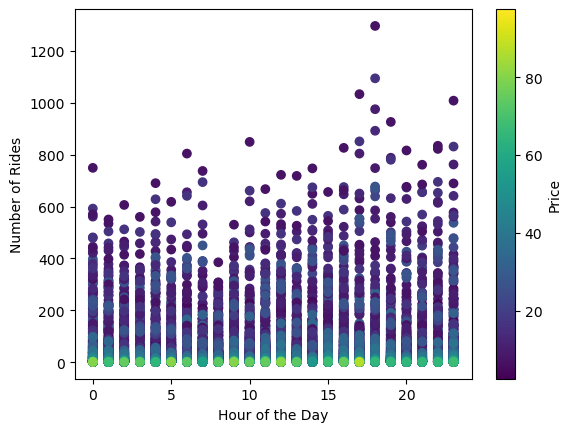

In [19]:
price_rides_weather = dropna_reduced_df.groupby(['hour', 'short_summary', 'price']).size().reset_index(name='numb_rides')
plt.scatter(price_rides_weather['hour'], price_rides_weather['numb_rides'], c=price_rides_weather['price'])
clb = plt.colorbar()
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Rides")
clb.set_label("Price")
plt.show()

In [27]:
price_rides_weather
rides_per_hour_weather = dropna_reduced_df.groupby(['hour', 'short_summary']).size().reset_index(name='numb_rides')
rides_per_hour_weather

,hour,short_summary,numb_rides
0,0,Clear,8876
1,0,Mostly Cloudy,5182
2,0,Overcast,6905
3,0,Partly Cloudy,3459
4,0,Rain,5450
...,...,...,...
128,23,Clear,3256
129,23,Light Rain,4580
130,23,Mostly Cloudy,1711
131,23,Overcast,11740


In [29]:
#Using Pearson correlation to see if there is a relationship b/n time of day and # of rides

correlation_rides_hour = st.pearsonr(rides_per_hour_weather['hour'], rides_per_hour_weather['numb_rides'])
print(f"The Pearson correlation coefficient between hour and number of rides is {round(correlation_rides_hour[0],2)}")

The Pearson correlation coefficient between hour and number of rides is 0.16


In [30]:
#Checking sum of rides based on hour
total_rides_by_hour = rides_per_hour_weather.groupby(['hour']).sum()
total_rides_by_hour

,short_summary,numb_rides
hour,,
0,Clear Mostly Cloudy Overcast Partly Cloudy...,29872
1,Clear Mostly Cloudy Overcast Partly Cloudy...,26310
2,Clear Light Rain Mostly Cloudy Overcast P...,26323
3,Clear Foggy Light Rain Mostly Cloudy Over...,25530
4,Clear Light Rain Mostly Cloudy Overcast R...,26125
5,Clear Drizzle Foggy Mostly Cloudy Overcas...,22995
6,Clear Foggy Light Rain Mostly Cloudy Over...,25147
7,Clear Drizzle Light Rain Mostly Cloudy Ov...,22930
8,Clear Foggy Light Rain Mostly Cloudy Over...,22337


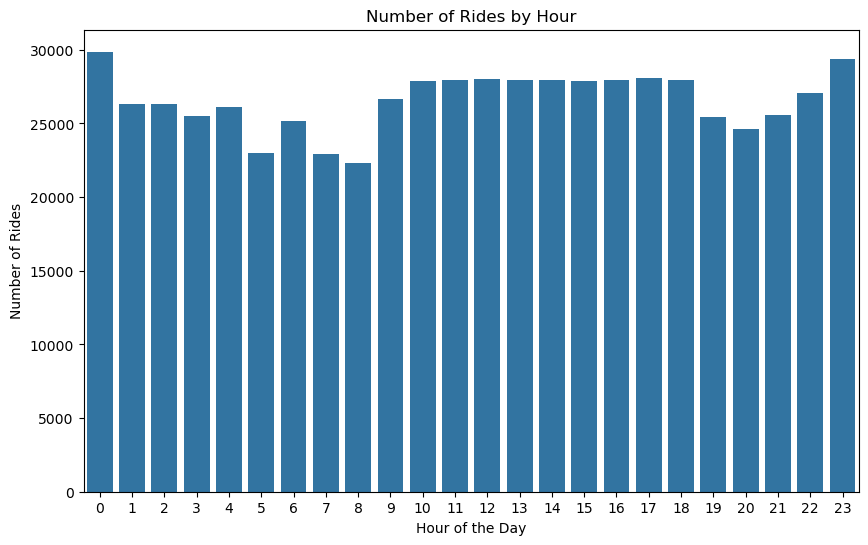

In [33]:
plt.figure(figsize=(10,6))
sns.barplot(x='hour', y='numb_rides', data=total_rides_by_hour)
plt.title("Number of Rides by Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Rides")

plt.show()

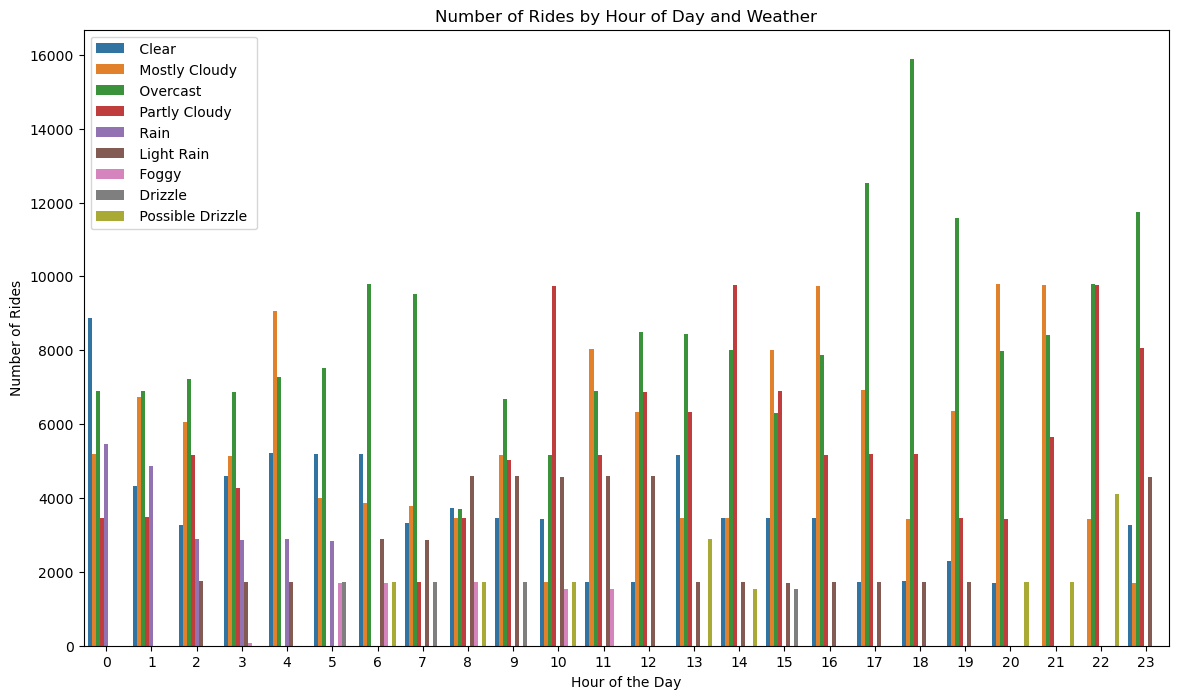

In [34]:
rides_per_hour_weather = dropna_reduced_df.groupby(['hour', 'short_summary']).size().reset_index(name='num_rides')

plt.figure(figsize=(14,8))

#Seaborn Bar Plot creates a bar plot that represents # of rides
sns.barplot(x='hour', y='num_rides', hue='short_summary', data=rides_per_hour_weather)

plt.title("Number of Rides by Hour of Day and Weather")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Rides")
plt.legend(title= "Weather")
plt.xticks(range(24))
plt.legend(loc='upper left')

#plt.xticks(["16", "18"])

plt.show()

In [35]:
# Check min and max values for price
print(dropna_reduced_df["price"].max())
print(dropna_reduced_df["price"].min())

97.5
2.5


In [36]:
#running normality test on price, data is not normally distributed
st.normaltest(dropna_reduced_df["price"].sample(500))

NormaltestResult(statistic=60.71568996151171, pvalue=6.542676425723638e-14)

In [37]:
avgprice_weather = dropna_reduced_df.groupby(['short_summary']).mean()
avgprice_weather



,timestamp,hour,day,month,price,distance
short_summary,,,,,,
Clear,2018-12-07 05:38:57.156784640,8.670878,19.917227,11.564556,16.486460,2.185388
Drizzle,2018-12-12 13:44:35.093340416,8.836729,19.063643,11.770706,16.501784,2.175958
Foggy,2018-11-30 16:25:19.631959552,7.851664,11.753980,11.619392,16.540883,2.161761
Light Rain,2018-12-02 16:43:54.555692544,11.492909,15.831901,11.545536,16.561282,2.193693
Mostly Cloudy,2018-12-05 04:25:12.992305920,11.745392,17.819625,11.561823,16.594419,2.194945
Overcast,2018-12-07 06:11:05.665692416,12.589334,17.217685,11.649842,16.535116,2.186401
Partly Cloudy,2018-12-06 00:51:05.068766720,13.544777,17.348216,11.603407,16.552009,2.191447
Possible Drizzle,2018-12-04 20:38:09.220156160,15.258908,16.114870,11.602934,16.481390,2.194799
Rain,2018-11-30 05:58:40.402381056,2.064001,25.428447,11.157155,16.539987,2.183036


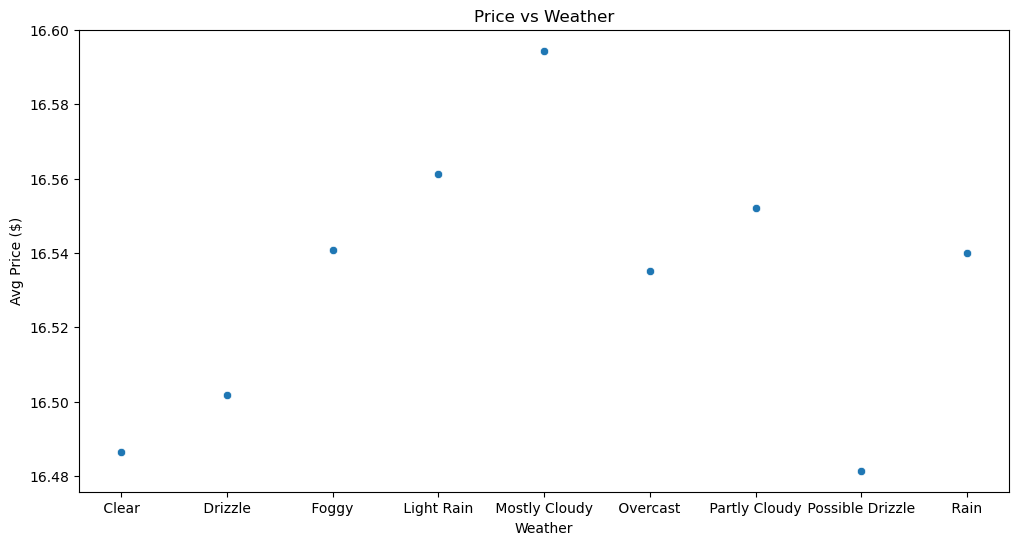

In [38]:
plt.figure(figsize=(12,6))

#Seaborn Bar Plot creates a bar plot that represents # of rides
sns.scatterplot(x='short_summary', y='price', data=avgprice_weather)

plt.title("Price vs Weather")
plt.xlabel("Weather")
plt.ylabel("Avg Price ($)")
plt.show()

/var/folders/ld/9d4kd_s57gb7pmyzfqtc9lqm0000gn/T/ipykernel_80041/649490953.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='short_summary', y='price', data=dropna_reduced_df, palette='Set3', showmeans=True)


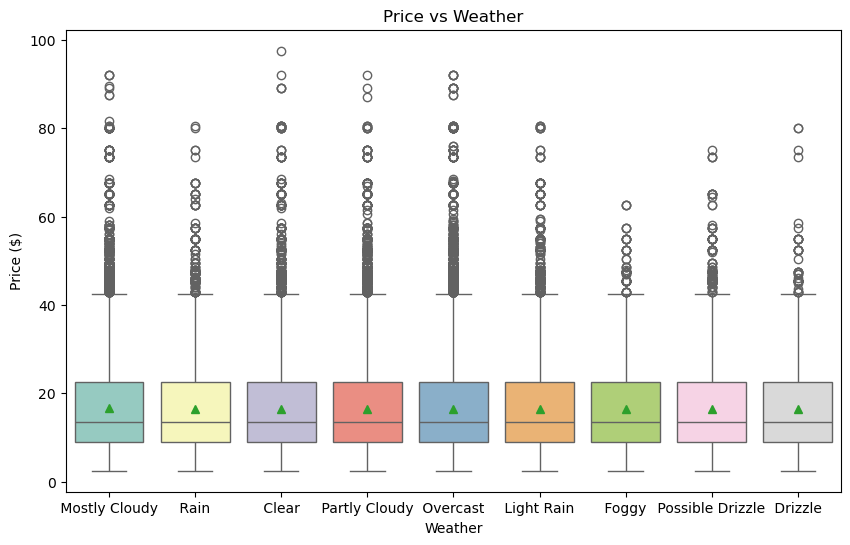

In [39]:
plt.figure(figsize=(10,6))

#Seaborn Bar Plot creates a bar plot that represents # of rides
sns.boxplot(x='short_summary', y='price', data=dropna_reduced_df, palette='Set3', showmeans=True)

plt.title("Price vs Weather")
plt.xlabel("Weather")
plt.ylabel("Price ($)")


plt.show()

In [40]:
#This box plot shows that the data is not normally distributed because it shows
# most of the data lies closer to the lower whisker
#triangle shows the mean; the line in the middle is the median; 
#top of the box is the upper quartile, lower line of the box shows the lower quartile

In [41]:
hour_comparison_df = dropna_reduced_df[["hour", "price", "short_summary"]]
hour_comparison_df
gb_hour_comparison = hour_comparison_df.groupby(["hour"]).sum()
gb_hour_comparison


,price,short_summary
hour,,
0,495121.50,Overcast Overcast Partly Cloudy Overcast ...
1,434477.50,Clear Rain Clear Clear Rain Clear Mostl...
2,435956.35,Rain Clear Rain Partly Cloudy Rain Mostl...
3,422259.00,Partly Cloudy Clear Rain Overcast Overcas...
4,433134.50,Clear Mostly Cloudy Mostly Cloudy Mostly C...
5,380273.30,Overcast Clear Overcast Overcast Overcast...
6,415411.50,Foggy Clear Overcast Mostly Cloudy Clear ...
7,378153.00,Overcast Overcast Mostly Cloudy Overcast ...
8,370868.50,Possible Drizzle Clear Light Rain Mostly C...
